**Importing the desired packages**

In [1]:
import numpy as np
import pyvista
import math

**Defining the mesh**

In [2]:
#Defining the points of the mesh
points = np.array([[0,0,0],
                  [2,0,0],
                  [1,1,0],
                  [4,0,0],
                  [3,1,0],
                  [1,-1,0],
                  [3,-1,0],
                  [6,0,0],
                  [5,1,0],
                  [5,-1,0],
                  [2,-2,0],
                  [4,-2,0]])
#Defining the cells of the mesh
cells = [[3, 0,1,2], 
         [3, 1,3,4],
         [3, 1,4,2],
         [3, 0,5,1],
         [3, 5,6,1],
         [3, 6,3,1],
         [3, 3,8,4],
         [3, 3,7,8],
         [3, 6,3,9],
         [3, 9,7,3],
         [3, 5,10,6],
         [3, 10,11,6],
         [3, 11,9,6]]

**Determining whether triangular mesh or square mesh**

In [3]:
if cells[0][0] == 3: #If the mesh is triangular
    z1 = 3
    z2 = 5
    
elif cells[0][0] == 4: #If the mesh is square
    z1 = 4
    z2 = 6


**Creating a center point for each cell**

In [4]:
#----------------------------------------------#
#----Creating a center point in each cell------#
#----------------------------------------------#

len_cells = len(cells) #the total number of cells in the mesh
len_points = len(points)
p = [] 
i = 0
center = []

for y in range(0,len_cells):
    for x in range(1,5):
        if i < z1:
            a = points[cells[y][x]]
            p.append(a)
            i = i+1
        elif i == z1:
            if z1==3: #if triangle
                c = (p[0]+p[1]+p[2])/3
                center.append(c)
            elif z1==4: #if square
                c = (p[0]+p[1]+p[2]+p[3])/4
                center.append(c)
            i=0
            p = []

In [6]:
Orthogonality = []

for z in range (0,len_cells):    
    #-------------------------------------------------#
    #-------Determining the neighbouring cells--------#
    #-------------------------------------------------#
    d = cells[z][1]
    e = cells[z][2]
    f = cells[z][3]
    y = [] #numbers neighbouring cell

    x=0
    while True:
        if x == len_cells:
            x=0
            break
            
        elif x <= len_cells:
            if d in cells[x][1:] and e in cells[x][1:]:
                if x != z:
                    y.append(x)
                    x = 0
                    break
        x=x+1
    
    while True:
        if x == len_cells:
            x=0
            break
            
        elif x<= len_cells:
            if e in cells[x][1:] and f in cells[x][1:]:
                if x != z:
                    y.append(x)
                    x = 0
                    break
        x=x+1
        
    while True:
        if x == len_cells:
            x = 0
            break
            
        elif x<= len_cells:
            if f in cells[x][1:] and d in cells[x][1:]:
                if x != z:
                    y.append(x)
                    x = 0
                    break 
        x=x+1  
        
    #------------------------------------------#
    #------Calculating the Orthogonality-------#
    #------------------------------------------#
    
    orthogonalitytotal = []
    
    for x in range(0,len(y)):
        o = center[z]
        a = abs(center[y[x]]-o)
        if a[0] == 0 or a[1]==0:
            orthogonalitytotal.append(0)
        else:
            alpha = math.degrees(math.atan(a[1]/a[0]))
            orthogonalitya = abs((90-alpha)/(90))
            orthogonalitytotal.append(orthogonalitya)
  
    orthogonality = sum(orthogonalitytotal)/len(y)
    Orthogonality.append(orthogonality)
    
Orthogonality

[0.39758361765043326,
 0.5301114902005777,
 0.7951672353008665,
 0.39758361765043326,
 0.5301114902005777,
 0.5301114902005777,
 0.7951672353008665,
 0.39758361765043326,
 0.5301114902005777,
 0.39758361765043326,
 0.3975836176504332,
 0.7951672353008664,
 0.3975836176504332]

C:\Users\20192167\Anaconda3\lib\site-packages\pyvista\jupyter\notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


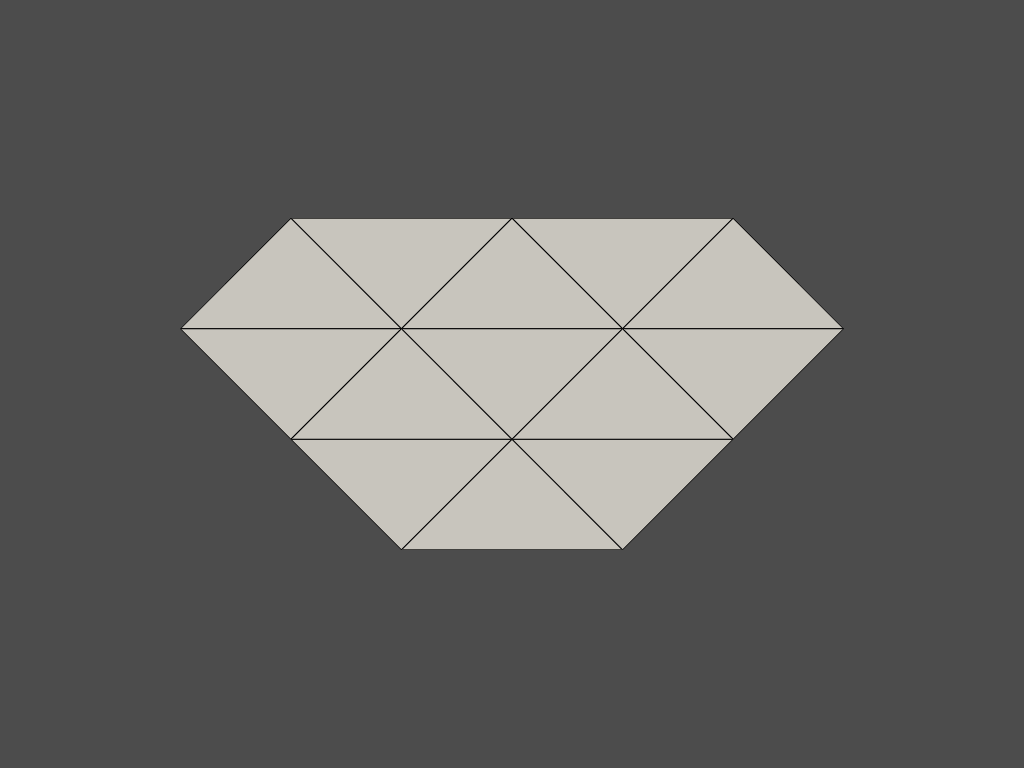

In [7]:
points1= np.vstack((points,center))
#-------------------------------------------#
#---------Plotting the new mesh-------------#
#-------------------------------------------#
mesh = pyvista.PolyData(points1, cells)
pl = pyvista.Plotter()
pl.add_mesh(mesh, show_edges=True, line_width=0.5)
#label_coords = mesh.points + [0, 0, 0.01]
#pl.add_point_labels(label_coords, [f'Point {i}' for i in range(len(points1))],
#                    font_size=20, point_size=20)
pl.camera_position = 'xy'
pl.show() 